<a href="https://colab.research.google.com/github/Eliasamuneke/Quickstart_lab/blob/main/Amazon_Musical_Instrument_Reviews_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installing and Importng the necessary library

In [1]:
import pandas as pd                                                         # Basic libraries
import numpy as np 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string
from nltk.corpus import stopwords
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import nltk                                                                # NLTK libraries
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn                                                             # Machine Learning libraries
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing  
from sklearn import metrics                                                 # Metrics libraries
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt                                             # Visualization libraries
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
from scipy import interp
from collections import Counter
from imblearn.over_sampling import SMOTE

### Downloading the dataset

In [2]:
!wget http://34.82.108.37/amazonReviewsTrain.csv.zip                 # Getting the training dataset from the link
!unzip amazonReviewsTrain.csv.zip                                    # Unzip the dataset

--2022-11-20 10:15:32--  http://34.82.108.37/amazonReviewsTrain.csv.zip
Connecting to 34.82.108.37:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39456705 (38M) [application/zip]
Saving to: ‘amazonReviewsTrain.csv.zip’

amazonReviewsTrain. 100%[===================>]  37.63M  14.0MB/s    in 2.7s    

2022-11-20 10:15:35 (14.0 MB/s) - ‘amazonReviewsTrain.csv.zip’ saved [39456705/39456705]

Archive:  amazonReviewsTrain.csv.zip
  inflating: amazonReviewsTrain.csv  


In [3]:
!wget  http://34.82.108.37/amazonReviewsTest.csv                        # Getting the test dataset

--2022-11-20 10:15:40--  http://34.82.108.37/amazonReviewsTest.csv
Connecting to 34.82.108.37:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4240573 (4.0M) [application/octet-stream]
Saving to: ‘amazonReviewsTest.csv’

amazonReviewsTest.c 100%[===================>]   4.04M  3.70MB/s    in 1.1s    

2022-11-20 10:15:42 (3.70 MB/s) - ‘amazonReviewsTest.csv’ saved [4240573/4240573]



### Reading the dataset

In [4]:
train_data = pd.read_csv('amazonReviewsTrain.csv')                       # Reading the training dataset using pandas dataframe
train_data

verified   reviewTime      reviewerID        asin  \
0           True   05 4, 2017  A2QNLVLQHW6OOC  B00NEZNT74   
1           True   12 1, 2014  A32SHV461SUWNQ  B002Q0WTCE   
2           True  12 23, 2015  A2SKHG5ULPYIMC  B0002GFP9I   
3           True   09 4, 2013  A2MFJ6C67AL015  B003AJVKDO   
4           True  08 28, 2015   ACYCDUUE9A3T2  B004XNK7AI   
...          ...          ...             ...         ...   
221387      True  08 16, 2015  A1TWEBKVZDD2JJ  B0002H05BA   
221388      True   01 8, 2012   AP32V2GXAK9VM  B000WME8C2   
221389      True  10 22, 2017   A4BIHE0AYAMTP  B00MD7S06O   
221390      True   01 9, 2016  A3OCE03MZ2PC2J  B0017PLYCK   
221391      True  01 15, 2013  A3T3KPW2QE866W  B0002II7H8   

                               reviewerName  \
0                                  Jason L.   
1                                Richard C.   
2       BellaLatinaReina-ACP Zero-Nine-Five   
3                                    BOS116   
4                              jack edwards   
...                                     ...   
221387                           Obey Giant   
221388                                 Grey   
221389                            divbyzero   
221390                               scaper   
221391                               leelee   

                                               reviewText  \
0              Have 30 of these in operation great lights   
1       Good replacement.  I prefer my Rovner L5, but ...   
2       My son & band teacher loves it. Really nice. B...   
3       This was a gift for a friend who is a fan of t...   
4       Wish it would attach to my violin a little eas...   
...                                                   ...   
221387  Still hard to beat D'Addario. Hope they keep i...   
221388  Ortofon hits the nail right on the head with t...   
221389  This is my absolute favorite guitar strap amon...   
221390                                               nice   
221391  This polishing cloth is well-made and a great ...   

                                                  summary  unixReviewTime  \
0                                              Five Stars      1493856000   
1                 Good replacement. I prefer my Rovner L5      1417392000   
2                    Really Helps With Their Practice Pad      1450828800   
3                                            Guitar picks      1378252800   
4       ... to my violin a little easier but it works ...      1440720000   
...                                                   ...             ...   
221387                                         Five Stars      1439683200   
221388                       Headshell Impovment?  YES!!!      1325980800   
221389                            ecclesiastical / hippie      1508630400   
221390                                         Five Stars      1452297600   
221391                              Great polishing cloth      1358208000   

       vote                                              style  \
0       NaN                                  {'Size:': ' 4PC'}   
1       NaN                                                NaN   
2       NaN                                                NaN   
3       NaN                                {'Color:': ' Logo'}   
4       NaN                        {'Color:': ' Black - SN-5'}   
...     ...                                                ...   
221387  NaN  {'Size:': ' Regular Light, 10-46', 'Style:': '...   
221388  7.0                               {'Color:': ' Black'}   
221389  NaN                                                NaN   
221390  NaN                                                NaN   
221391  NaN                                                NaN   

                                                    image    rating  
0                                                     NaN  positive  
1                                                     NaN  positive  
2                                                

In [5]:
pd.set_option('display.max_rows', None)

In [6]:
train_data['rating']

0         positive
1         positive
2         positive
3         positive
4         positive
5         positive
6         positive
7          neutral
8         positive
9         negative
10        positive
11        positive
12        positive
13        positive
14        positive
15        positive
16        positive
17        positive
18        positive
19         neutral
20        positive
21        positive
22        positive
23        positive
24        positive
25        positive
26        positive
27        positive
28         neutral
29        positive
30        positive
31        positive
32        positive
33        negative
34        positive
35         neutral
36        positive
37        positive
38        positive
39        positive
40        positive
41         neutral
42        positive
43        positive
44        positive
45        positive
46        positive
47        positive
48        positive
49        positive
50        positive
51        positive
52        po

In [7]:
print('The information in the Dataset:' + str( train_data.info()))      # Printing the dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221392 entries, 0 to 221391
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   verified        221392 non-null  bool  
 1   reviewTime      221392 non-null  object
 2   reviewerID      221392 non-null  object
 3   asin            221392 non-null  object
 4   reviewerName    221358 non-null  object
 5   reviewText      221344 non-null  object
 6   summary         221344 non-null  object
 7   unixReviewTime  221392 non-null  int64 
 8   vote            33295 non-null   object
 9   style           116012 non-null  object
 10  image           3703 non-null    object
 11  rating          221392 non-null  object
dtypes: bool(1), int64(1), object(10)
memory usage: 18.8+ MB
The information in the Dataset:None


In [8]:
train_data.isnull().sum()                            # Check for null values

verified               0
reviewTime             0
reviewerID             0
asin                   0
reviewerName          34
reviewText            48
summary               48
unixReviewTime         0
vote              188097
style             105380
image             217689
rating                 0
dtype: int64

### Data Preprocessing process

In [9]:
train_data = train_data.drop(['reviewerID','reviewerName','verified','vote','style','image'],axis=1)     # Dropping the unnecessary calumns which can not able to effect on our model
train_data = train_data.rename(columns={'asin':'productID', 'unixReviewTime':'unixTime'})                # Renaming some columns name
train_data.isnull().sum().sort_values(ascending=False)
train_data = train_data.dropna()                                                                         # Calling the dropna function
train_data.head()

reviewTime   productID                                         reviewText  \
0   05 4, 2017  B00NEZNT74         Have 30 of these in operation great lights   
1   12 1, 2014  B002Q0WTCE  Good replacement.  I prefer my Rovner L5, but ...   
2  12 23, 2015  B0002GFP9I  My son & band teacher loves it. Really nice. B...   
3   09 4, 2013  B003AJVKDO  This was a gift for a friend who is a fan of t...   
4  08 28, 2015  B004XNK7AI  Wish it would attach to my violin a little eas...   

                                             summary    unixTime    rating  
0                                         Five Stars  1493856000  positive  
1            Good replacement. I prefer my Rovner L5  1417392000  positive  
2               Really Helps With Their Practice Pad  1450828800  positive  
3                                       Guitar picks  1378252800  positive  
4  ... to my violin a little easier but it works ...  1440720000  positive

In [10]:
train_data['reviewTime'] = pd.to_datetime(train_data['reviewTime'])    # Converting the reviewtime as year wise
train_data['reviewYear'] = train_data['reviewTime'].dt.year
train_data = train_data.drop(['unixTime','reviewTime'],axis=1)         # Dropping the unixtime and reviewtime 
train_data.head()                                                      # Printing the top 5 records bydefault

productID                                         reviewText  \
0  B00NEZNT74         Have 30 of these in operation great lights   
1  B002Q0WTCE  Good replacement.  I prefer my Rovner L5, but ...   
2  B0002GFP9I  My son & band teacher loves it. Really nice. B...   
3  B003AJVKDO  This was a gift for a friend who is a fan of t...   
4  B004XNK7AI  Wish it would attach to my violin a little eas...   

                                             summary    rating  reviewYear  
0                                         Five Stars  positive        2017  
1            Good replacement. I prefer my Rovner L5  positive        2014  
2               Really Helps With Their Practice Pad  positive        2015  
3                                       Guitar picks  positive        2013  
4  ... to my violin a little easier but it works ...  positive        2015

### Defined a method which can able to measure the length of review text

In [11]:
def length(text):                                                               # Define a method for measure the length or review text                       
    return len(text)
train_data['length'] = train_data['reviewText'].apply(length)                   # Applying the lenght measure function              
train_data.head()

productID                                         reviewText  \
0  B00NEZNT74         Have 30 of these in operation great lights   
1  B002Q0WTCE  Good replacement.  I prefer my Rovner L5, but ...   
2  B0002GFP9I  My son & band teacher loves it. Really nice. B...   
3  B003AJVKDO  This was a gift for a friend who is a fan of t...   
4  B004XNK7AI  Wish it would attach to my violin a little eas...   

                                             summary    rating  reviewYear  \
0                                         Five Stars  positive        2017   
1            Good replacement. I prefer my Rovner L5  positive        2014   
2               Really Helps With Their Practice Pad  positive        2015   
3                                       Guitar picks  positive        2013   
4  ... to my violin a little easier but it works ...  positive        2015   

   length  
0      42  
1     111  
2      76  
3      90  
4      69

In [13]:
train_data['sentiment'] = train_data['rating']                    # Replacing the sentiment rating into the numerical sentiment
train_data['sentiment'] = train_data['sentiment'].replace({
    'negative':1,
    'neutral':2,
    'positive':3
})
train_data.head()

productID                                         reviewText  \
0  B00NEZNT74         Have 30 of these in operation great lights   
1  B002Q0WTCE  Good replacement.  I prefer my Rovner L5, but ...   
2  B0002GFP9I  My son & band teacher loves it. Really nice. B...   
3  B003AJVKDO  This was a gift for a friend who is a fan of t...   
4  B004XNK7AI  Wish it would attach to my violin a little eas...   

                                             summary    rating  reviewYear  \
0                                         Five Stars  positive        2017   
1            Good replacement. I prefer my Rovner L5  positive        2014   
2               Really Helps With Their Practice Pad  positive        2015   
3                                       Guitar picks  positive        2013   
4  ... to my violin a little easier but it works ...  positive        2015   

   length  sentiment  
0      42          3  
1     111          3  
2      76          3  
3      90          3  
4      69          3

### Data Visualization process

In [16]:
plt.figure(figsize=[10,5])                                            # Setting the size of graph plot
sns.countplot(train_data['sentiment'],palette='tab10').set_title('Music Instrument sentiment Countplot')

Text(0.5, 1.0, 'Music Instrument sentiment Countplot')

In [17]:
score = train_data['rating'].value_counts()                  # Plotting the pychart view of sentiment percentage count
labels = score.index
values = score.values
scores = go.Pie(labels = labels,
               values = values,
               hole = 0.10)
df_scores = [scores]
layout = go.Layout(
           title = ' %  Ratings for Musical Instruments')
fig = go.Figure(data = df_scores,
                 layout = layout)
py.iplot(fig)

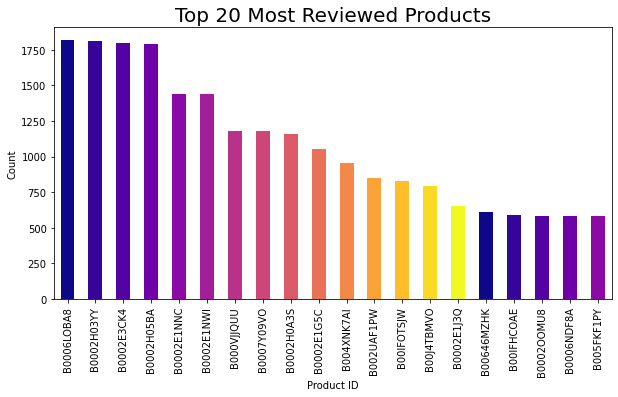

In [19]:
color = plt.cm.plasma(np.linspace(0, 1, 15))                                    # Plotting the most review product bar graph plot
train_data['productID'].value_counts()[:20].plot.bar(color = color, figsize = (10, 5))
plt.title('Top 20 Most Reviewed Products', fontsize = 20)
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.show()

In [20]:
year = train_data['reviewYear'].value_counts()          # Plotting the year wise pie chart percentage plot
labels = year.index 
values = year.values
years = go.Pie(labels = labels,
               values = values,
               hole = 0.10)
df_years = [years]
layout = go.Layout(
           title = 'Percentage of Years for Amazon Musical Instruments Review')
fig = go.Figure(data = df_years,
                 layout = layout)
py.iplot(fig)

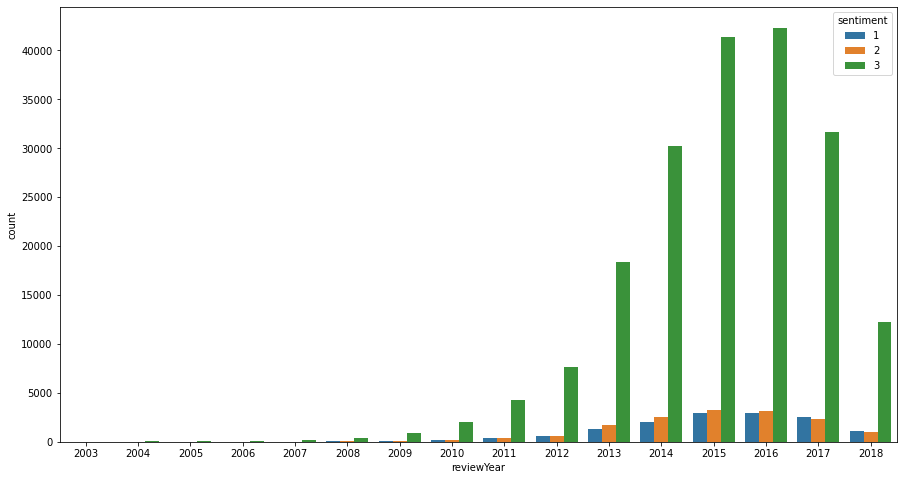

In [26]:
plt.figure(figsize=[15,8])
sns.countplot(train_data['reviewYear'],hue=train_data['sentiment'],palette='tab10')

### Data Cleaning process for builind the model feeding

In [28]:
def review_cleaning(text):                         # Define a method for clean the special char from the text review content
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [29]:
train_data['reviewText']=train_data['reviewText'].apply(lambda x:review_cleaning(x))
train_data.head()

productID                                         reviewText  \
0  B00NEZNT74           have  of these in operation great lights   
1  B002Q0WTCE  good replacement  i prefer my rovner  but ther...   
2  B0002GFP9I  my son  band teacher loves it really nice boug...   
3  B003AJVKDO  this was a gift for a friend who is a fan of t...   
4  B004XNK7AI  wish it would attach to my violin a little eas...   

                                             summary    rating  reviewYear  \
0                                         Five Stars  positive        2017   
1            Good replacement. I prefer my Rovner L5  positive        2014   
2               Really Helps With Their Practice Pad  positive        2015   
3                                       Guitar picks  positive        2013   
4  ... to my violin a little easier but it works ...  positive        2015   

   length  sentiment  
0      42          3  
1     111          3  
2      76          3  
3      90          3  
4      69          3

### Making a dictionary of stop words

In [30]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [31]:
train_data['reviewText'] = train_data['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))     # Removing stopwords
train_data.head()

productID                                         reviewText  \
0  B00NEZNT74                             operation great lights   
1  B002Q0WTCE  good replacement prefer rovner but theres noth...   
2  B0002GFP9I  son band teacher loves really nice bought pad ...   
3  B003AJVKDO                 gift friend fan beatles happy gift   
4  B004XNK7AI  wish would attach violin little easier but wor...   

                                             summary    rating  reviewYear  \
0                                         Five Stars  positive        2017   
1            Good replacement. I prefer my Rovner L5  positive        2014   
2               Really Helps With Their Practice Pad  positive        2015   
3                                       Guitar picks  positive        2013   
4  ... to my violin a little easier but it works ...  positive        2015   

   length  sentiment  
0      42          3  
1     111          3  
2      76          3  
3      90          3  
4      69          3

### Doing the ploarity of the review content

In [32]:
train_data['polarity'] = train_data['reviewText'].map(lambda text: TextBlob(text).sentiment.polarity)

train_data['review_len'] = train_data['reviewText'].astype(str).apply(len)

train_data['word_count'] = train_data['reviewText'].apply(lambda x: len(str(x).split()))


In [34]:
label_encoder = preprocessing.LabelEncoder()                                    # calling the label encoder function
train_data['sentiment']= label_encoder.fit_transform(train_data['sentiment'])   # Encode labels in column 'sentiment'. 
train_data['sentiment'].unique() 

array([2, 1, 0])

In [35]:
train_data['sentiment'].value_counts()                                  # Checking for counts

2    191860
1     15333
0     14104
Name: sentiment, dtype: int64

In [36]:
review_features=train_data.copy()                                         # Extracting 'reviews' for processing
review_features=review_features[['reviewText']].reset_index(drop=True)
review_features.head()

reviewText
0                             operation great lights
1  good replacement prefer rovner but theres noth...
2  son band teacher loves really nice bought pad ...
3                 gift friend fan beatles happy gift
4  wish would attach violin little easier but wor...

In [38]:
ps = PorterStemmer()                                                 # Performing stemming on the review dataframe
corpus = []                                                          # splitting and adding the stemmed words except stopwords
for i in range(0, len(review_features)):
    review = re.sub('[^a-zA-Z]', ' ', review_features['reviewText'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review) 

In [39]:
corpus                              # Printing the corpus

['oper great light',
 'good replac prefer rovner but there noth wrong if look',
 'son band teacher love realli nice bought pad separ also',
 'gift friend fan beatl happi gift',
 'wish would attach violin littl easier but work great',
 'great microphon use cheapbudget behring mixer sound good if turn gain will pick everyth room great record acoust guitar vocal dont start layer vocal though start sound kind weird',
 'best abi ive ever own',
 'rate star overton issu make no mistak advertis say pointexclus sound shape technolog sst provid ideal amount dampen tailor individu size drum headth sound dampen point sound like head underwat bathtub no overton but incred rapid decay even reson head tune exactli tension drum dial well without bottom head would probabl great head record overton sustain drum will make even best soundman cring simpli durabl head next zero sustain no overton if that bag head definit not compat brand drum head set though',
 'capo refin perfect pressur great rubber pad s

In [40]:
print('rating: ', train_data[train_data['length'] == train_data['length'].max()]['rating'].iloc[0])

rating:  positive


Text(0.5, 1.0, 'Rating vs Length')

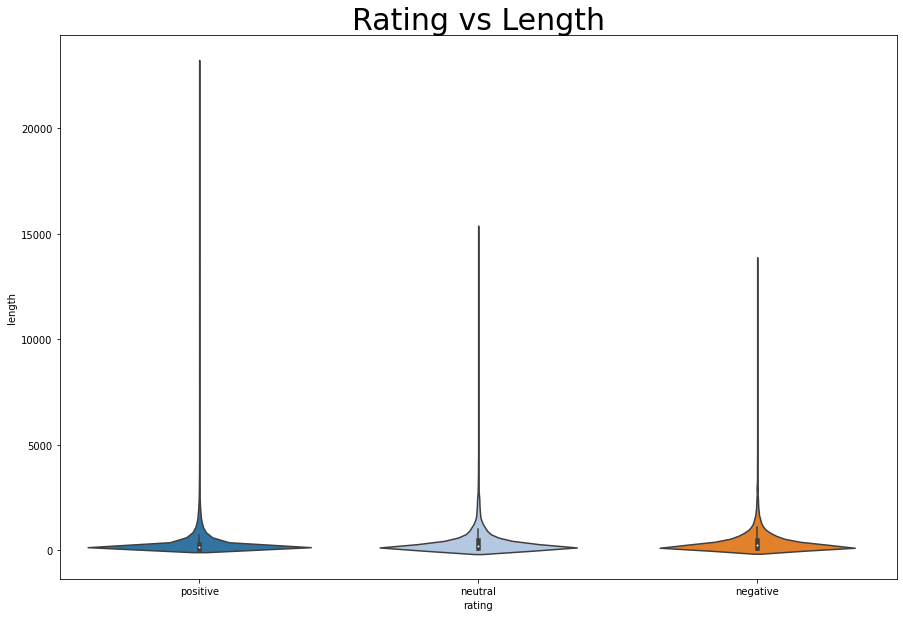

In [46]:
plt.figure(figsize=[15,10])                                # Plotting violinplot of rating vas length 
sns.violinplot(train_data['rating'], train_data['length'], palette='tab20')
plt.title('Rating vs Length', fontsize = 30)

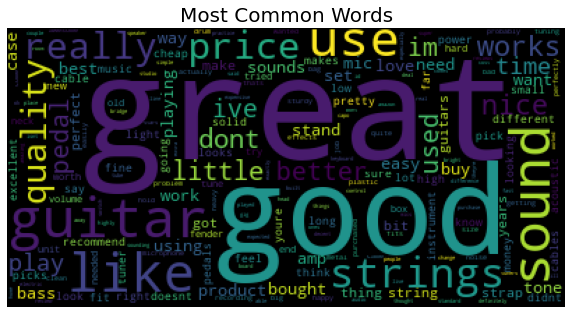

In [47]:
cv = CountVectorizer(stop_words = 'english')                   # Doing counter vectorization as english stopword
words = cv.fit_transform(train_data['reviewText'])
sum_words = words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
wordcloud = WordCloud().generate_from_frequencies(dict(words_freq))
plt.figure(figsize=(10, 10))                                       # Plotting the graph review
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Most Common Words", fontsize = 20)
plt.show()

In [48]:
df = train_data.copy()                     # Copy the data into df variable

In [50]:
nltk.download("stopwords")                                # Downloading the nltk stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [49]:
def text_process(review):                                                       # Define a method to remove the all stops words including the nltk stopwords dictionary
    nopunc = [char for char in review if char not in string.punctuation]        # Check characters to see if they are in punctuation
    nopunc = ''.join(nopunc)                                                    # Join the characters again to form the string
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]   # Remove stopwords

In [51]:
df['reviewText'] = df['reviewText'].apply(text_process)                         # applying the processed data on revew text

In [52]:
df['reviewText'].head()                                                         # Printing top 5 cleaned text dataset 


0                           [operation, great, lights]
1    [good, replacement, prefer, rovner, theres, no...
2    [son, band, teacher, loves, really, nice, boug...
3            [gift, friend, fan, beatles, happy, gift]
4    [wish, would, attach, violin, little, easier, ...
Name: reviewText, dtype: object

### Dividing the preprocessed dataset as features and target variables on train and test dataset

In [53]:
text_train, text_test, sent_train, sent_test = train_test_split(df['reviewText'], df['sentiment'], test_size=0.2)      # Divinding the combined dataset as 80 by 20 ratio 

print(len(text_train), len(text_test), len(sent_train) + len(sent_test))

177037 44260 221297


### Making the pipeline for classifier

In [54]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),                    # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),                   # train on TF-IDF vectors w/ Naive Bayes classifier
])

### Fitting the dataset for training 

In [55]:
pipeline.fit(text_train,sent_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f773e5fe050>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

### Predicting the model value

In [56]:
predictions = pipeline.predict(text_test)          # Predicting the value

In [58]:
print(classification_report(predictions,sent_test))    # Printing the model accuracy summary

              precision    recall  f1-score   support

           0       0.00      0.80      0.00         5
           1       0.00      0.45      0.00        11
           2       1.00      0.87      0.93     44244

    accuracy                           0.87     44260
   macro avg       0.33      0.71      0.31     44260
weighted avg       1.00      0.87      0.93     44260

